In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.metrics.scorer import make_scorer
from preprocess import preprocess_train, preprocess, \
FEATURES, CATEGORICAL_FEATURES, TEST_FEATURES, CATEGORICAL_TEST_FEATURES_IDX

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [3]:
X, y = preprocess_train(train, categotical_features=CATEGORICAL_FEATURES, features=TEST_FEATURES)
X, y = shuffle(X, y)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train.columns

Index([u'id', u'bulk_id', u'spalen', u'date1', u'start_square', u'value',
       u'price', u'mean_sq', u'mean_fl', u'plan_s', u'plan_m', u'plan_l',
       u'vid_0', u'vid_1', u'vid_2', u'month', u'month_cnt', u'Класс объекта',
       u'Количество помещений', u'Огорожена территория',
       u'Площадь земельного участка', u'Входные группы', u'Детский сад',
       u'Школа', u'Поликлиника', u'ФОК', u'Спортивная площадка', u'Автомойка',
       u'Кладовые', u'Колясочные', u'Кондиционирование', u'Вентлияция',
       u'Лифт', u'Система мусоротведения', u'Видеонаблюдение',
       u'Подземная парковка', u'Двор без машин', u'Машиномест',
       u'Площадь пром. зоны в радиусе 500 м',
       u'Площадь зеленой зоны в радиусе 500 м', u'До Кремля', u'До ТТК(км)',
       u'До Садового(км)', u'До большой дороги на машине(км)',
       u'До удобной авторазвязки на машине(км)', u'До метро пешком(км)',
       u'До промки(км)', u'До парка(км)', u'До парка пешком(км)',
       u'Станций метро от кольца', u'Пло

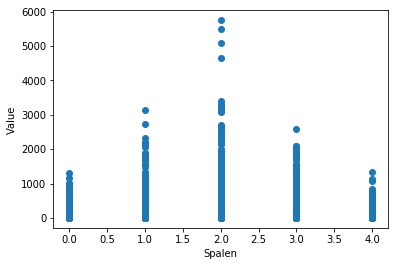

In [6]:
# Spalen
plt.scatter(train.spalen, train.value)
plt.xlabel("Spalen")
plt.ylabel("Value")

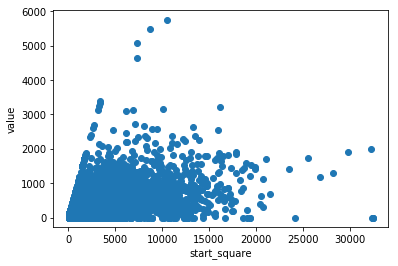

In [7]:
plt.scatter(train.start_square, train.value)
plt.xlabel("start_square")
plt.ylabel("value")

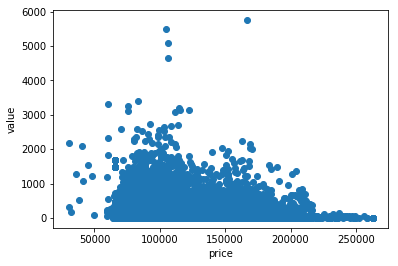

In [8]:
plt.scatter(train.price, train.value)
plt.xlabel("price")
plt.ylabel("value")

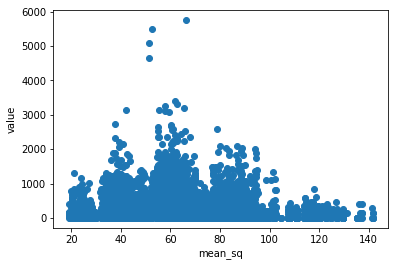

In [9]:
plt.scatter(train.mean_sq, train.value)
plt.xlabel("mean_sq")
plt.ylabel("value")

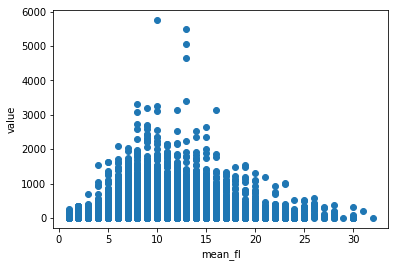

In [10]:
plt.scatter(train.mean_fl, train.value)
plt.xlabel("mean_fl")
plt.ylabel("value")

In [11]:
train['year'] = train.date1.str[:4].astype(int)

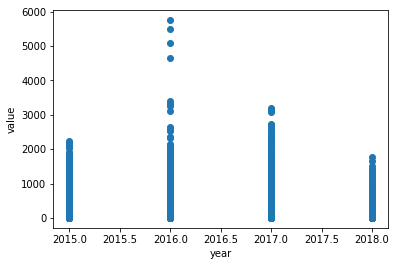

In [12]:
plt.scatter(train.year, train.value)
plt.xlabel("year")
plt.ylabel("value")

In [13]:
train['month'] = train.date1.str[5:7].astype(int)

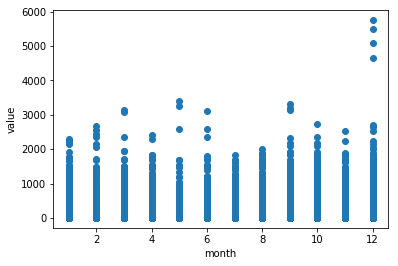

In [14]:
plt.scatter(train.month, train.value)
plt.xlabel("month")
plt.ylabel("value")

In [15]:
train['detailed_time'] = train.year + train.month / 12.

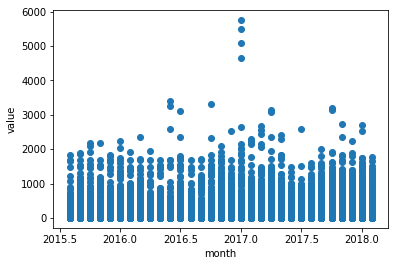

In [16]:
plt.scatter(train.detailed_time, train.value)
plt.xlabel("month")
plt.ylabel("value")

In [20]:
bulk_ids = train.bulk_id.unique()
bulk_mapping = {bulk_id: num for bulk_id, num in zip(bulk_ids, range(len(bulk_ids)))}

In [21]:
bulk_mapping

{'01778D74-9326-E711-96FE-001EC9D5643C': 96,
 '01FE2A0C-2215-E711-96FE-001EC9D5643C': 157,
 '030E1C6F-6CAF-E711-8547-00505688958B': 116,
 '053ECC9B-BFAD-E611-9FBE-001EC9D5643C': 119,
 '0585C911-A4C2-E611-B887-001EC9D5643C': 195,
 '073ECC9B-BFAD-E611-9FBE-001EC9D5643C': 120,
 '093ECC9B-BFAD-E611-9FBE-001EC9D5643C': 121,
 '095A20C2-C513-E711-96FE-001EC9D5643C': 41,
 '0A741758-AC58-E611-9523-001EC9D5643C': 213,
 '0B6E2454-371C-E611-9928-001EC9D5643C': 212,
 '0BD28148-DFDF-E611-B624-001EC9D56418': 176,
 '0C3D6171-4F15-E711-96FE-001EC9D5643C': 199,
 '0DD28148-DFDF-E611-B624-001EC9D56418': 178,
 '0E6FE41B-8808-E611-9928-001EC9D5643C': 39,
 '0FD28148-DFDF-E611-B624-001EC9D56418': 179,
 '11343FA0-ABDF-E511-B620-001EC9D5643C': 169,
 '11D28148-DFDF-E611-B624-001EC9D56418': 184,
 '15D28148-DFDF-E611-B624-001EC9D56418': 177,
 '166579E6-9E26-E711-96FE-001EC9D5643C': 110,
 '17D28148-DFDF-E611-B624-001EC9D56418': 175,
 '18E6A7C3-5F62-E711-97EC-001EC9D56418': 53,
 '19D28148-DFDF-E611-B624-001EC9D56418

In [22]:
train['bulk_cat'] = train.bulk_id.apply(lambda x: bulk_mapping[x])

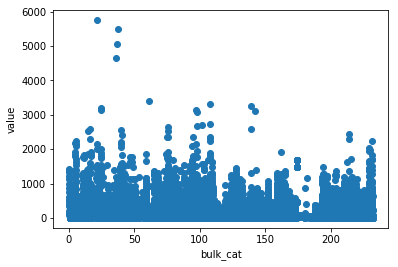

In [24]:
plt.scatter(train.bulk_cat, train.value)
plt.xlabel("bulk_cat")
plt.ylabel("value")

In [27]:
import cPickle as pickle

def save(obj, path):
    with open(path, 'w') as f:
        pickle.dump(obj, f)

In [28]:
save(bulk_mapping, "bulk_mapping.pkl")